##Unsupervised Customer Segmentation in E-Commerce


**Members: Aparna Kalla, Emre Can Baykurt, Sai Nruthya Vaka, Jaynender Singh**

## Problem Statement

In the highly competitive e-commerce landscape, businesses struggle to understand their customer base beyond surface-level metrics. Traditional segmentation approaches rely on predefined categories that fail to capture hidden purchasing behaviors, leading to inefficient marketing strategies, suboptimal product recommendations, and negative customer experiences. This lack of deep insights prevents companies from leveraging data-driven decision-making to enhance customer satisfaction and maximize revenue.

This project aims to bridge that gap by applying unsupervised machine learning techniques, such as clustering and association rule mining, to uncover natural customer segments based on transactional data. The dataset includes invoice records, product details, transaction quantities, pricing, timestamps, and customer geographic information, enabling a comprehensive analysis of purchasing behaviors.

Key transactional attributes such as InvoiceNo (indicating purchases and cancellations), StockCode and Description (product details), Quantity (purchase volume), InvoiceDate (transaction timing), UnitPrice (price per unit), CustomerID (unique customer identifier), and Country (customer location) provide a rich foundation for meaningful segmentation.

By identifying patterns in purchasing behavior, businesses can tailor personalized promotions, optimize product recommendations, and predict customer churn more effectively. Additionally, insights from transaction timestamps and geolocation data can help in seasonality analysis, demand forecasting, and targeted regional marketing strategies.

This data-driven approach will enable companies to allocate resources efficiently, enhance customer engagement, reduce churn, and ultimately increase revenue through optimized marketing and inventory management strategies.

## Motivation

In today’s highly competitive and data-driven e-commerce landscape, effective customer segmentation is crucial for businesses seeking to enhance personalization, optimize marketing strategies, and maximize customer retention. A nuanced understanding of customer behavior empowers companies to deliver hyper-targeted promotions, recommend highly relevant products, and refine user experiences, ultimately boosting engagement, conversion rates, and long-term revenue growth. By leveraging data-driven insights instead of rigid predefined categories, businesses can adapt to evolving consumer preferences, allocate resources efficiently, and gain a sustainable competitive advantage in the marketplace.



**This data-driven segmentation will directly enhance several critical business areas:**

Marketing Optimization: Personalized marketing campaigns tailored to specific customer segments will increase engagement and conversion rates, improving return on investment (ROI).

Customer Retention: Identifying high-value and at-risk customers enables businesses to implement loyalty programs and retention strategies, reducing churn rates.

Inventory Management: Understanding product demand variations across customer segments allows for better stock management, reducing the risks of overstocking or understocking.

By shifting from static segmentation to dynamic, data-driven insights, businesses can allocate resources efficiently, improve customer satisfaction, and gain a competitive advantage in the rapidly evolving e-commerce market.

##Introduction

Understanding who your customers are and how they shop is critical to staying competitive. A UK-based online retail store specializing in unique, all-occasion gifts operates in a dynamic marketplace where both individual buyers and wholesalers shape purchasing patterns. However, traditional segmentation methods fail to capture the complexity of customer behaviors, leading to missed marketing opportunities, inefficient inventory management, and higher churn rates.

This project leverages unsupervised machine learning techniques, particularly clustering, to uncover hidden customer segments within transactional data spanning from December 2010 to December 2011. By analyzing key purchase details—from invoice patterns and product preferences to order values and geographic insights—we aim to transform raw data into actionable business intelligence.

## **Data Dictionary**

| **Variable Name** | **Type**       | **Description**  |
|------------------|---------------|------------------|
| **InvoiceNo**    | Categorical   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation. |
| **StockCode**    | Categorical   | A 5-digit integral number uniquely assigned to each distinct product. |
| **Description**  | Categorical   | Product name. |
| **Quantity**     | Integer       | The quantity of each product (item) per transaction. |
| **InvoiceDate**  | Date          | The day and time when each transaction was generated. |
| **UnitPrice**    | Continuous    | Product price per unit. |
| **CustomerID**   | Categorical   | A 5-digit integral number uniquely assigned to each customer. |
| **Country**      | Categorical   | The name of the country where each customer resides. |


##Data Cleaning

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

Reading the data files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1 = pd.read_excel('/content/drive/MyDrive/BA820 Team 4/Data Set/Online Retail 2.xlsx')
data2 = pd.read_excel('/content/drive/MyDrive/BA820 Team 4/Data Set/online_retail_II 2.xlsx')

Standardizing Column Names for Consistency Across Multiple Files
Renaming columns across datasets ensures uniformity, making it easier to merge, analyze, and process the data. Inconsistent column names can lead to errors when performing joins, aggregations, and machine learning tasks. This step helps maintain data integrity, improves readability, and allows for seamless integration of multiple sources in later stages of analysis.

In [ ]:
data2 = data2.rename(columns={'Invoice': 'InvoiceNo', 'Customer ID': 'CustomerID', 'Price': 'UnitPrice'})

Concatinating the 2 datasets

In [ ]:
data = pd.concat([data1, data2], ignore_index=True)

Viewing null values

In [ ]:
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,243007
Country,0


We can see that ~243k customer Ids are null and ~4k descriptions are null.

Unique invoice numbers:

In [ ]:
data.InvoiceNo.nunique()

53628

In [ ]:
invoice_customer_counts = data.groupby('InvoiceNo')['CustomerID'].nunique()

In [ ]:
invoice_customer_counts[invoice_customer_counts>1]

,CustomerID
InvoiceNo,


Every invoice number is assosciated with one customerID.
For every NaN customer id we first check with the respective invoice number in the dataset and populate it. If the customer id is still NaN, we will  create new customerIDs by grouping by invoice number.

In [ ]:
data.CustomerID.nunique()

5942

In [ ]:
max(data.CustomerID)

18287.0

Since the max available customerID is 18287 - we will create new IDs starting 19000.

In [ ]:
data[data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1067140,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
1067141,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
1067142,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
1067143,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [ ]:
data[data['CustomerID'].isna()]['InvoiceNo'].nunique()

8752

For example:

In [ ]:
data[data['InvoiceNo']==536414]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1045469,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom


We will replace the customerID in these 2 rows to newid.

In [ ]:
missing_customer_data = data[data['CustomerID'].isna()].copy()

This code block will map the existing customers and create new ids for new customers.

In [ ]:
existing_customer_map = data.dropna(subset=['CustomerID']).set_index('InvoiceNo')['CustomerID'].to_dict()


missing_customer_data['CustomerID'] = missing_customer_data['InvoiceNo'].map(existing_customer_map)


no_customer_invoices = missing_customer_data['CustomerID'].isna()

missing_customer_data.loc[no_customer_invoices, 'CustomerID'] = (
    missing_customer_data.loc[no_customer_invoices]
    .groupby('InvoiceNo').ngroup() + 19000
)


Around 44k customers were existing in the database already.

In [ ]:
len(existing_customer_map)

44876

In [ ]:
data.update(missing_customer_data)

In [ ]:
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


As seen here, no null customer id is present.

Moving on, lets examine if quantity column has negative values.

In [ ]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067140,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,24002.0,United Kingdom
1067141,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,24001.0,United Kingdom
1067143,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,24004.0,United Kingdom
1067144,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,24005.0,United Kingdom


On observing further we see that some invoice numbers start w "C" and have q<0 - which tells us that they are canceled orders.

In [ ]:
data[(data['Quantity']<0) & (data['InvoiceNo'].str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
1066604,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
1066605,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
1066606,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
1066607,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


there are 19493 canceled invoices.

lets see if there rows which are not canceled invoice numbers but still have q<0.

In [ ]:
data[(data['Quantity']<0) & (~data['InvoiceNo'].astype(str).str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,23843.0,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,23849.0,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,23866.0,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,23867.0,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,23868.0,United Kingdom
...,...,...,...,...,...,...,...,...
1066367,538092,37467,NaN,-177,2010-12-09 14:49:00,0.0,23977.0,United Kingdom
1067140,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,24002.0,United Kingdom
1067141,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,24001.0,United Kingdom
1067143,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.0,24004.0,United Kingdom


So, these 3457 rows are basically returned. Lets add an "R" infront of these invoice numbers for distinguishing.

In [ ]:
mask = (data['Quantity'] < 0) & (~data['InvoiceNo'].astype(str).str.startswith('C'))
data.loc[mask, 'InvoiceNo'] = 'R' + data.loc[mask, 'InvoiceNo'].astype(str)

cross checking if "R" is added.

In [ ]:
data[(data['Quantity']<0) & (~data['InvoiceNo'].astype(str).str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,R536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,23843.0,United Kingdom
4347,R536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,23849.0,United Kingdom
7188,R536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,23866.0,United Kingdom
7189,R536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,23867.0,United Kingdom
7190,R536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,23868.0,United Kingdom
...,...,...,...,...,...,...,...,...
1066367,R538092,37467,NaN,-177,2010-12-09 14:49:00,0.0,23977.0,United Kingdom
1067140,R538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,24002.0,United Kingdom
1067141,R538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,24001.0,United Kingdom
1067143,R538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.0,24004.0,United Kingdom


In [ ]:
data[data.UnitPrice <0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,27359.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,27360.0,United Kingdom
721312,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,27355.0,United Kingdom
818183,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,27356.0,United Kingdom
945381,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,27357.0,United Kingdom


We observe some UnitPrice being negative but that is okay since it is to Adjust bad debt

In [ ]:
data[data.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,23830.0,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,23832.0,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,23833.0,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,23834.0,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,23835.0,United Kingdom
...,...,...,...,...,...,...,...,...
1066639,538141,22218,NaN,2,2010-12-09 15:58:00,0.0,23993.0,United Kingdom
1066640,538143,84534B,NaN,1,2010-12-09 15:58:00,0.0,23995.0,United Kingdom
1067140,R538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,24002.0,United Kingdom
1067141,R538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,24001.0,United Kingdom


Here, we can see that for one StockCode there are 4 different types of description.

In [ ]:
data[data.StockCode==22139]['Description'].value_counts()

,count
Description,
RETROSPOT TEA SET CERAMIC 11 PC,1368
RETRO SPOT TEA SET CERAMIC 11 PC,813
amazon,2
11 PC CERAMIC TEA SET POLKADOT,1


In [ ]:
data[data.StockCode==20956]['Description'].value_counts()

,count
Description,
PORCELAIN T-LIGHT HOLDERS ASSORTED,261
?,2
check,1


We see that one StockCode has multiple but similar description so we will replace the description with the most commonly occuring one.

In [ ]:
description_mode = (
    data.dropna(subset=['Description'])
    .groupby('StockCode')['Description']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

data['Description'] = data['Description'].fillna(data['StockCode'].map(description_mode))

In [ ]:
data[data.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
74825,R542529,DCGS0055,NaN,-1,2011-01-28 13:08:00,0.0,24311.0,United Kingdom
74839,R542532,DCGS0074,NaN,-1,2011-01-28 13:09:00,0.0,24313.0,United Kingdom
75295,R542582,DCGS0057,NaN,-6,2011-01-28 15:01:00,0.0,24351.0,United Kingdom
108688,R545566,37477D,NaN,-9,2011-03-03 16:14:00,0.0,24559.0,United Kingdom
279252,R561250,DCGS0071,NaN,-2,2011-07-26 11:51:00,0.0,26053.0,United Kingdom
...,...,...,...,...,...,...,...,...
840748,518487,gift_0001_90,NaN,10,2010-08-09 12:28:00,0.0,22398.0,United Kingdom
840752,518490,gift_0001_60,NaN,10,2010-08-09 12:29:00,0.0,22401.0,United Kingdom
843950,R518785,C3,NaN,-4999,2010-08-11 16:55:00,0.0,22424.0,United Kingdom
883904,R522781,84247D,NaN,-3,2010-09-16 14:38:00,0.0,22793.0,United Kingdom


There are still some NaN but we will deal with that in later stages.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining, summarizing, and visualizing a dataset to understand its structure, detect patterns, identify anomalies, and derive insights before applying advanced modeling techniques.

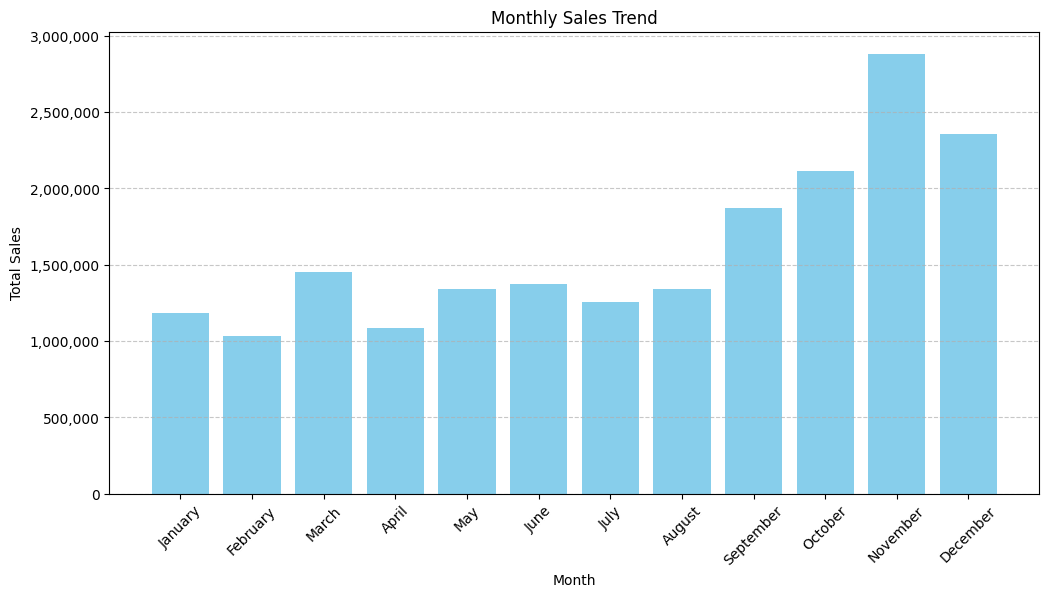

In [ ]:
monthly_trend = data.groupby('Month')['total_price'].sum().reset_index()

# Convert month numbers to month names
monthly_trend['Month'] = monthly_trend['Month'].apply(lambda x: calendar.month_name[x])

# Plot the trend as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_trend['Month'], monthly_trend['total_price'], color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

The bar chart illustrates the monthly sales trend throughout the year. Sales remain relatively steady in the first half, with a noticeable peak in March. A decline is observed during the summer months, particularly in July and August. However, sales experience a significant surge from September onwards, reaching the highest point in November, likely due to holiday shopping. December maintains strong sales, though slightly lower than November. This pattern suggests a seasonal impact on consumer purchasing behavior.

<ipython-input-159-f7d99a1843ae>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




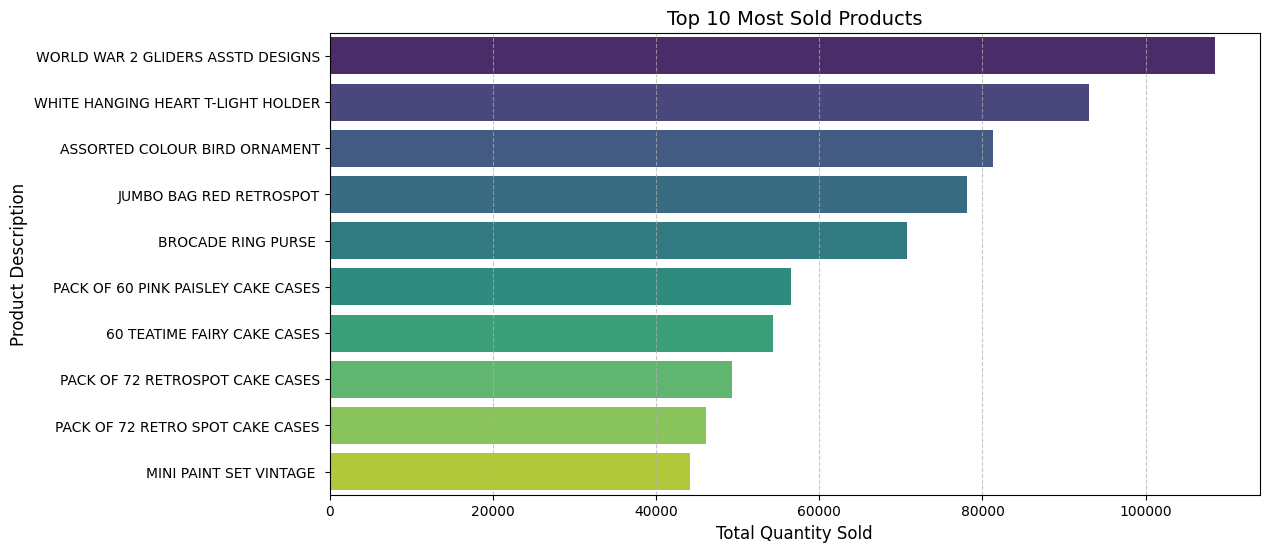

In [ ]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')

# Customize the plot
plt.title('Top 10 Most Sold Products', fontsize=14)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The best-selling product is "WORLD WAR 2 GLIDERS ASSTD DESIGNS," followed closely by "WHITE HANGING HEART T-LIGHT HOLDER," highlighting the strong demand for decorative and novelty items. Additionally, the presence of cake cases and popcorn holders among the top 10 bestsellers suggests that baking and party-related products are frequently purchased together. This trend provides valuable insights for Market Basket Analysis, enabling businesses to identify complementary product pairings and optimize cross-selling strategies.

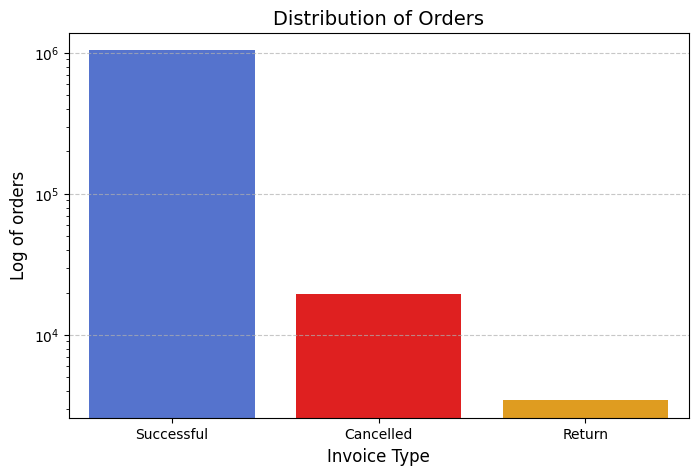

In [ ]:
def categorize_invoice(invoice_no):
    if str(invoice_no).startswith('R'):
        return 'Return'
    elif str(invoice_no).startswith('C'):
        return 'Cancelled'
    else:
        return 'Successful'

data['Invoice_Type'] = data['InvoiceNo'].apply(categorize_invoice)
invoice_counts = data['Invoice_Type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=invoice_counts.index, y=invoice_counts.values, palette=['royalblue', 'red', 'orange'])
plt.yscale('log')
plt.title('Distribution of Orders', fontsize=14)
plt.xlabel('Invoice Type', fontsize=12)
plt.ylabel('Log of orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart illustrates the distribution of orders by invoice type using a logarithmic scale. "Successful" orders dominate with the highest count, significantly outnumbering both "Cancelled" and "Return" orders. "Cancelled" orders occur at a much lower frequency, while "Return" orders are the least common. This indicates a high success rate in transactions, with relatively low cancellation and return rates, suggesting efficient order fulfillment and customer satisfaction.

Here, we create a new column called "total_price".

In [ ]:
data['total_price'] = data['Quantity'] * data['UnitPrice']

data.sort_values(by='total_price', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
783736,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,21947.0,United Kingdom,25111.09
974085,530715,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,2010-11-04 11:36:00,1.69,15838.0,United Kingdom,15818.40
...,...,...,...,...,...,...,...,...,...
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
818183,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,27356.0,United Kingdom,-44031.79
721312,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,27355.0,United Kingdom,-53594.36
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60


The further analysis will done at the InvoiceNo level so we group the dataset by invoiceNo.

## Market Basket Analysis

Market Basket Analysis (MBA) is a data mining technique used to uncover patterns and relationships between products that are frequently purchased together. By analyzing transactional data, businesses can identify product associations, enabling them to implement personalized recommendations, cross-selling strategies, and targeted promotions. This approach is particularly valuable in e-commerce and retail, as it helps optimize product placement, bundle offerings, and marketing campaigns to enhance customer experience and drive revenue growth.

In [ ]:
df_grouped = data.groupby('InvoiceNo').agg(lambda x: list(x)).reset_index()
df_grouped

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,489434,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2...","[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...","[12, 12, 12, 48, 24, 24, 24, 10]","[2009-12-01 07:45:00, 2009-12-01 07:45:00, 200...","[6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]","[13085.0, 13085.0, 13085.0, 13085.0, 13085.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[83.4, 81.0, 81.0, 100.80000000000001, 30.0, 3..."
1,489435,"[22350, 22349, 22195, 22353]","[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...","[12, 12, 24, 12]","[2009-12-01 07:46:00, 2009-12-01 07:46:00, 200...","[2.55, 3.75, 1.65, 2.55]","[13085.0, 13085.0, 13085.0, 13085.0]","[United Kingdom, United Kingdom, United Kingdo...","[30.599999999999998, 45.0, 39.599999999999994,..."
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22...","[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...","[10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1...","[2009-12-01 09:06:00, 2009-12-01 09:06:00, 200...","[5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...","[13078.0, 13078.0, 13078.0, 13078.0, 13078.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[59.5, 98.10000000000001, 17.85, 27.04, 20.85,..."
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213...","[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...","[6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,...","[2009-12-01 09:08:00, 2009-12-01 09:08:00, 200...","[2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...","[15362.0, 15362.0, 15362.0, 15362.0, 15362.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[12.600000000000001, 12.600000000000001, 10.2,..."
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214...","[DINOSAURS WRITING SET , SET OF MEADOW FLOWE...","[28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5...","[2009-12-01 09:24:00, 2009-12-01 09:24:00, 200...","[0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....","[18102.0, 18102.0, 18102.0, 18102.0, 18102.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[27.439999999999998, 50.699999999999996, 34.5,..."
...,...,...,...,...,...,...,...,...,...
53623,R581210,[23395],[check],[-26],[2011-12-07 18:36:00],[0.0],[27336.0],[United Kingdom],[-0.0]
53624,R581212,[22578],[lost],[-1050],[2011-12-07 18:38:00],[0.0],[27338.0],[United Kingdom],[-0.0]
53625,R581213,[22576],[check],[-30],[2011-12-07 18:38:00],[0.0],[27339.0],[United Kingdom],[-0.0]
53626,R581226,[23090],[missing],[-338],[2011-12-08 09:56:00],[0.0],[27342.0],[United Kingdom],[-0.0]


A new column called "total_price_sum" is created.

In [ ]:
df_grouped['total_price_sum'] = df_grouped['total_price'].apply(lambda x: sum(x) if isinstance(x, list) else x)
df_grouped = df_grouped[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
                         'UnitPrice', 'CustomerID', 'Country', 'total_price', 'total_price_sum']]
df_grouped.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,total_price_sum
0,489434,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2...","[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...","[12, 12, 12, 48, 24, 24, 24, 10]","[2009-12-01 07:45:00, 2009-12-01 07:45:00, 200...","[6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]","[13085.0, 13085.0, 13085.0, 13085.0, 13085.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[83.4, 81.0, 81.0, 100.80000000000001, 30.0, 3...",505.30
1,489435,"[22350, 22349, 22195, 22353]","[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...","[12, 12, 24, 12]","[2009-12-01 07:46:00, 2009-12-01 07:46:00, 200...","[2.55, 3.75, 1.65, 2.55]","[13085.0, 13085.0, 13085.0, 13085.0]","[United Kingdom, United Kingdom, United Kingdo...","[30.599999999999998, 45.0, 39.599999999999994,...",145.80
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22...","[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...","[10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1...","[2009-12-01 09:06:00, 2009-12-01 09:06:00, 200...","[5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...","[13078.0, 13078.0, 13078.0, 13078.0, 13078.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[59.5, 98.10000000000001, 17.85, 27.04, 20.85,...",630.33
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213...","[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...","[6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,...","[2009-12-01 09:08:00, 2009-12-01 09:08:00, 200...","[2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...","[15362.0, 15362.0, 15362.0, 15362.0, 15362.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[12.600000000000001, 12.600000000000001, 10.2,...",310.75
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214...","[DINOSAURS WRITING SET , SET OF MEADOW FLOWE...","[28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5...","[2009-12-01 09:24:00, 2009-12-01 09:24:00, 200...","[0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....","[18102.0, 18102.0, 18102.0, 18102.0, 18102.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[27.439999999999998, 50.699999999999996, 34.5,...",2286.24


Upon some observation we can see that some rows have multiple timestamps - maybe due to the slow server, server crashes or time delays. To simplify our analysis - we only keep the first timestamp recorded.

In [ ]:
df_grouped['unique_timestamps'] = df_grouped['InvoiceDate'].apply(lambda x: len(set(x)) if isinstance(x, list) else 1)

df_grouped[df_grouped['unique_timestamps'] > 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,total_price_sum,unique_timestamps
1578,492807,"[85131A, 85129A, 85129D, 85129B, 85129A, 21645...","[BEADED PEARL HEART WHITE ON STICK, WHITE PEAR...","[1, 2, 4, 3, 3, 12, 1, 6, 4, 6, 12, 2, 2, 2, 2...","[2009-12-20 12:28:00, 2009-12-20 12:28:00, 200...","[1.25, 1.25, 1.25, 1.25, 1.25, 1.65, 3.75, 4.9...","[17211.0, 17211.0, 17211.0, 17211.0, 17211.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[1.25, 2.5, 5.0, 3.75, 3.75, 19.79999999999999...",342.82,2
2134,494166,"[84971S, 84975, 84988, 84990, 84991, 84992, 85...","[SMALL HEART FLOWERS HOOK , HEART SHAPED MIRRO...","[1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2010-01-12 09:47:00, 2010-01-12 09:47:00, 201...","[1.66, 3.36, 2.98, 1.28, 1.28, 1.28, 2.51, 0.8...","[19494.0, 19494.0, 19494.0, 19494.0, 19494.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[1.66, 6.72, 5.96, 2.56, 3.84, 1.28, 2.51, 0.8...",1923.20,2
4505,499967,"[21524, 48185, 20723, 20724, 20725, 21937, 850...","[DOOR MAT SPOTTY HOME SWEET HOME, DOOR MAT FAI...","[10, 10, 20, 20, 20, 15, 20, 20, 10, 20, 20, 4...","[2010-03-03 14:06:00, 2010-03-03 14:06:00, 201...","[6.35, 6.35, 0.85, 0.85, 1.65, 2.95, 1.95, 1.9...","[16636.0, 16636.0, 16636.0, 16636.0, 16636.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[63.5, 63.5, 17.0, 17.0, 33.0, 44.25, 39.0, 39...",1311.45,2
4733,500353,"[22136, 21154, 22073, 20754, 79072, 21217, 212...","[LOVE HEART SOCK HANGER, RED SPOTTY OVEN GLOVE...","[12, 10, 4, 6, 2, 3, 24, 24, 24, 18, 6, 6, 6, ...","[2010-03-07 15:24:00, 2010-03-07 15:24:00, 201...","[1.65, 1.25, 3.75, 2.1, 9.95, 9.95, 0.55, 0.55...","[12668.0, 12668.0, 12668.0, 12668.0, 12668.0, ...","[Germany, Germany, Germany, Germany, Germany, ...","[19.799999999999997, 12.5, 15.0, 12.6000000000...",1966.84,2
4919,500827,"[20984, 21033, 21035, 21107, 21110, 21116, 211...","[12 PENCILS TALL TUBE POSY, JUMBO BAG CHARLIE ...","[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, ...","[2010-03-10 11:10:00, 2010-03-10 11:10:00, 201...","[1.66, 5.91, 5.91, 5.91, 13.57, 8.47, 2.51, 12...","[20573.0, 20573.0, 20573.0, 20573.0, 20573.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[1.66, 11.82, 17.73, 5.91, 13.57, 8.47, 2.51, ...",2163.04,2
...,...,...,...,...,...,...,...,...,...,...,...
37310,571735,"[22086, 84879, 22456, 22457, 22427, 22424, 224...","[PAPER CHAIN KIT 50'S CHRISTMAS , ASSORTED COL...","[40, 40, 18, 48, 12, 8, 16, 48, 12, 12, 12, 12...","[2011-10-19 10:03:00, 2011-10-19 10:03:00, 201...","[2.55, 1.69, 4.25, 2.55, 5.45, 10.95, 4.25, 1....","[14229.0, 14229.0, 14229.0, 14229.0, 14229.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[102.0, 67.6, 76.5, 122.39999999999999, 65.4, ...",785.07,2
38391,574076,"[10135, 15036, 16168M, 16236, 16237, 17038, 20...","[COLOURING PENCILS BROWN TUBE, ASSORTED COLOUR...","[1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 3, 3, 3, 1, ...","[2011-11-02 15:37:00, 2011-11-02 15:38:00, 201...","[2.46, 1.63, 0.83, 0.42, 0.42, 0.83, 4.13, 5.7...","[26930.0, 26930.0, 26930.0, 26930.0, 26930.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[2.46, 3.26, 1.66, 0.42, 1.26, 0.83, 4.13, 5.7...",3514.74,2
39328,576057,"[21977, 21975, 84992, 84991, 23308, 23309, 212...","[PACK OF 60 PINK PAISLEY CAKE CASES, PACK OF 6...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 2, 2, 2, 6, ...","[2011-11-13 15:05:00, 2011-11-13 15:05:00, 201...","[0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.5...","[15861.0, 15861.0, 15861.0, 15861.0, 15861.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[3.3000000000000003, 3.3000000000000003, 3.300...",219.79,2
40552,578548,"[23322, 23323, 23221, 23219, 23223, 23210, 232...","[LARGE WHITE HEART OF WICKER, WHITE WICKER STA...","[2, 7, 5, 2, 1, 3, 1, 2, 3, 2, 5, 2, 3, 1, 1, ...","[2011-11-24 15:02:00, 2011-11-24 15:02:00, 201...","[2.95, 2.1, 0.83, 1.25, 0.83, 1.25, 0.83, 0.85...","[17345.0, 17345.0, 17345.0, 17345.0, 17345.0,

For instance:

In [ ]:
invoice_dates = df_grouped[df_grouped['InvoiceNo'] == 492807]['InvoiceDate']

unique_dates = set([time for sublist in invoice_dates for time in sublist])
print(unique_dates)

{Timestamp('2009-12-20 12:28:00'), Timestamp('2009-12-20 12:29:00')}


Keeping only the first recorded timestamp

In [ ]:
df_grouped['InvoiceDate'] = df_grouped['InvoiceDate'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_grouped['InvoiceDate'] = pd.to_datetime(df_grouped['InvoiceDate'])

df_grouped = df_grouped.drop(columns=['unique_timestamps'])

df_grouped


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,total_price_sum
0,489434,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2...","[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...","[12, 12, 12, 48, 24, 24, 24, 10]",2009-12-01 07:45:00,"[6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]","[13085.0, 13085.0, 13085.0, 13085.0, 13085.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[83.4, 81.0, 81.0, 100.80000000000001, 30.0, 3...",505.30
1,489435,"[22350, 22349, 22195, 22353]","[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...","[12, 12, 24, 12]",2009-12-01 07:46:00,"[2.55, 3.75, 1.65, 2.55]","[13085.0, 13085.0, 13085.0, 13085.0]","[United Kingdom, United Kingdom, United Kingdo...","[30.599999999999998, 45.0, 39.599999999999994,...",145.80
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22...","[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...","[10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1...",2009-12-01 09:06:00,"[5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...","[13078.0, 13078.0, 13078.0, 13078.0, 13078.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[59.5, 98.10000000000001, 17.85, 27.04, 20.85,...",630.33
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213...","[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...","[6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,...",2009-12-01 09:08:00,"[2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...","[15362.0, 15362.0, 15362.0, 15362.0, 15362.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[12.600000000000001, 12.600000000000001, 10.2,...",310.75
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214...","[DINOSAURS WRITING SET , SET OF MEADOW FLOWE...","[28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5...",2009-12-01 09:24:00,"[0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....","[18102.0, 18102.0, 18102.0, 18102.0, 18102.0, ...","[United Kingdom, United Kingdom, United Kingdo...","[27.439999999999998, 50.699999999999996, 34.5,...",2286.24
...,...,...,...,...,...,...,...,...,...,...
53623,R581210,[23395],[check],[-26],2011-12-07 18:36:00,[0.0],[27336.0],[United Kingdom],[-0.0],0.00
53624,R581212,[22578],[lost],[-1050],2011-12-07 18:38:00,[0.0],[27338.0],[United Kingdom],[-0.0],0.00
53625,R581213,[22576],[check],[-30],2011-12-07 18:38:00,[0.0],[27339.0],[United Kingdom],[-0.0],0.00
53626,R581226,[23090],[missing],[-338],2011-12-08 09:56:00,[0.0],[27342.0],[United Kingdom],[-0.0],0.00


Verifying that none of the rows have more than one timestamp

In [ ]:
df_grouped['CustomerID_uniq'] = df_grouped['CustomerID'].apply(lambda x: len(set(x)) if isinstance(x, list) else 1)
df_grouped[df_grouped['CustomerID_uniq'] > 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,total_price_sum,CustomerID_uniq


Keeping only one customerID per record.

In [ ]:
df_grouped['CustomerID'] = df_grouped['CustomerID'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_grouped['CustomerID'] = pd.to_numeric(df_grouped['CustomerID'])


df_grouped

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,total_price_sum,CustomerID_uniq
0,489434,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2...","[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...","[12, 12, 12, 48, 24, 24, 24, 10]",2009-12-01 07:45:00,"[6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]",13085.0,"[United Kingdom, United Kingdom, United Kingdo...","[83.4, 81.0, 81.0, 100.80000000000001, 30.0, 3...",505.30,1
1,489435,"[22350, 22349, 22195, 22353]","[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...","[12, 12, 24, 12]",2009-12-01 07:46:00,"[2.55, 3.75, 1.65, 2.55]",13085.0,"[United Kingdom, United Kingdom, United Kingdo...","[30.599999999999998, 45.0, 39.599999999999994,...",145.80,1
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22...","[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...","[10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1...",2009-12-01 09:06:00,"[5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...",13078.0,"[United Kingdom, United Kingdom, United Kingdo...","[59.5, 98.10000000000001, 17.85, 27.04, 20.85,...",630.33,1
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213...","[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...","[6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,...",2009-12-01 09:08:00,"[2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...",15362.0,"[United Kingdom, United Kingdom, United Kingdo...","[12.600000000000001, 12.600000000000001, 10.2,...",310.75,1
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214...","[DINOSAURS WRITING SET , SET OF MEADOW FLOWE...","[28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5...",2009-12-01 09:24:00,"[0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....",18102.0,"[United Kingdom, United Kingdom, United Kingdo...","[27.439999999999998, 50.699999999999996, 34.5,...",2286.24,1
...,...,...,...,...,...,...,...,...,...,...,...
53623,R581210,[23395],[check],[-26],2011-12-07 18:36:00,[0.0],27336.0,[United Kingdom],[-0.0],0.00,1
53624,R581212,[22578],[lost],[-1050],2011-12-07 18:38:00,[0.0],27338.0,[United Kingdom],[-0.0],0.00,1
53625,R581213,[22576],[check],[-30],2011-12-07 18:38:00,[0.0],27339.0,[United Kingdom],[-0.0],0.00,1
53626,R581226,[23090],[missing],[-338],2011-12-08 09:56:00,[0.0],27342.0,[United Kingdom],[-0.0],0.00,1


Keeping one country per record.

In [ ]:
df_grouped['Country'] = df_grouped['Country'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_grouped

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,total_price_sum,CustomerID_uniq
0,489434,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2...","[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...","[12, 12, 12, 48, 24, 24, 24, 10]",2009-12-01 07:45:00,"[6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]",13085.0,United Kingdom,"[83.4, 81.0, 81.0, 100.80000000000001, 30.0, 3...",505.30,1
1,489435,"[22350, 22349, 22195, 22353]","[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...","[12, 12, 24, 12]",2009-12-01 07:46:00,"[2.55, 3.75, 1.65, 2.55]",13085.0,United Kingdom,"[30.599999999999998, 45.0, 39.599999999999994,...",145.80,1
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22...","[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...","[10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1...",2009-12-01 09:06:00,"[5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...",13078.0,United Kingdom,"[59.5, 98.10000000000001, 17.85, 27.04, 20.85,...",630.33,1
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213...","[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...","[6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,...",2009-12-01 09:08:00,"[2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...",15362.0,United Kingdom,"[12.600000000000001, 12.600000000000001, 10.2,...",310.75,1
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214...","[DINOSAURS WRITING SET , SET OF MEADOW FLOWE...","[28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5...",2009-12-01 09:24:00,"[0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....",18102.0,United Kingdom,"[27.439999999999998, 50.699999999999996, 34.5,...",2286.24,1
...,...,...,...,...,...,...,...,...,...,...,...
53623,R581210,[23395],[check],[-26],2011-12-07 18:36:00,[0.0],27336.0,United Kingdom,[-0.0],0.00,1
53624,R581212,[22578],[lost],[-1050],2011-12-07 18:38:00,[0.0],27338.0,United Kingdom,[-0.0],0.00,1
53625,R581213,[22576],[check],[-30],2011-12-07 18:38:00,[0.0],27339.0,United Kingdom,[-0.0],0.00,1
53626,R581226,[23090],[missing],[-338],2011-12-08 09:56:00,[0.0],27342.0,United Kingdom,[-0.0],0.00,1


Dropping unnecessary columns

In [ ]:
df_grouped.drop(columns=['CustomerID_uniq','total_price'], inplace=True)

In [ ]:
df_grouped.drop(columns=['Quantity','UnitPrice'], inplace=True)
df_grouped

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,total_price_sum
0,489434,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2...","[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...",2009-12-01 07:45:00,13085.0,United Kingdom,505.30
1,489435,"[22350, 22349, 22195, 22353]","[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...",2009-12-01 07:46:00,13085.0,United Kingdom,145.80
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22...","[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...",2009-12-01 09:06:00,13078.0,United Kingdom,630.33
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213...","[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...",2009-12-01 09:08:00,15362.0,United Kingdom,310.75
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214...","[DINOSAURS WRITING SET , SET OF MEADOW FLOWE...",2009-12-01 09:24:00,18102.0,United Kingdom,2286.24
...,...,...,...,...,...,...,...
53623,R581210,[23395],[check],2011-12-07 18:36:00,27336.0,United Kingdom,0.00
53624,R581212,[22578],[lost],2011-12-07 18:38:00,27338.0,United Kingdom,0.00
53625,R581213,[22576],[check],2011-12-07 18:38:00,27339.0,United Kingdom,0.00
53626,R581226,[23090],[missing],2011-12-08 09:56:00,27342.0,United Kingdom,0.00


We limit our dataset to "total_price_sum" >0 .

In [ ]:
df_grouped = df_grouped[df_grouped['total_price_sum'] > 0]
df_grouped

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,total_price_sum
0,489434,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2...","[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...",2009-12-01 07:45:00,13085.0,United Kingdom,505.30
1,489435,"[22350, 22349, 22195, 22353]","[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...",2009-12-01 07:46:00,13085.0,United Kingdom,145.80
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22...","[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...",2009-12-01 09:06:00,13078.0,United Kingdom,630.33
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213...","[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...",2009-12-01 09:08:00,15362.0,United Kingdom,310.75
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214...","[DINOSAURS WRITING SET , SET OF MEADOW FLOWE...",2009-12-01 09:24:00,18102.0,United Kingdom,2286.24
...,...,...,...,...,...,...,...
41934,581585,"[22481, 22915, 22178, 22460, 84832, 23084, 848...","[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...",2011-12-09 12:31:00,15804.0,United Kingdom,329.05
41935,581586,"[22061, 23275, 21217, 20685]","[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3...",2011-12-09 12:49:00,13113.0,United Kingdom,339.20
41936,581587,"[22631, 22556, 22555, 22728, 22727, 22726, 227...","[CIRCUS PARADE LUNCH BOX , PLASTERS IN TIN CIR...",2011-12-09 12:50:00,12680.0,France,249.45
41940,A563185,[B],[Adjust bad debt],2011-08-12 14:50:00,27358.0,United Kingdom,11062.06


Creating a new dataframe with stockcode for Market Basket Analysis

In [ ]:
df_des = df_grouped['StockCode']
df_des =pd.DataFrame(df_des)
df_des

,StockCode
0,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2..."
1,"[22350, 22349, 22195, 22353]"
2,"[48173C, 21755, 21754, 84879, 22119, 22142, 22..."
3,"[22143, 22145, 22130, 21364, 21360, 21351, 213..."
4,"[21329, 21252, 21100, 21033, 20711, 21410, 214..."
...,...
41934,"[22481, 22915, 22178, 22460, 84832, 23084, 848..."
41935,"[22061, 23275, 21217, 20685]"
41936,"[22631, 22556, 22555, 22728, 22727, 22726, 227..."
41940,[B]


Creating a list of all the StockCodes.

In [ ]:
data_column = df_des.iloc[:, 0]
data = data_column.apply(lambda x: x if isinstance(x, list) else str(x).split(','))
data = list(data)

In [ ]:
data

[[85048, '79323P', '79323W', 22041, 21232, 22064, 21871, 21523],
 [22350, 22349, 22195, 22353],
 ['48173C',
  21755,
  21754,
  84879,
  22119,
  22142,
  22296,
  22295,
  22109,
  22107,
  22194,
  '35004B',
  82582,
  21181,
  21756,
  21333,
  '84596F',
  '84596L',
  22111],
 [22143,
  22145,
  22130,
  21364,
  21360,
  21351,
  21352,
  35400,
  20695,
  37370,
  10002,
  '84507B',
  20703,
  21987,
  21989,
  '84970S',
  20971,
  22271,
  22272,
  22274,
  21912,
  22111,
  22112],
 [21329,
  21252,
  21100,
  21033,
  20711,
  21410,
  21411,
  '84031A',
  '84031B',
  '84032A',
  '84032B',
  '84519A',
  '84519B',
  '85132A',
  '85132C',
  '85183A',
  '85183B'],
 [22065,
  22138,
  22139,
  22352,
  '85014A',
  '85014B',
  '16161P',
  '16169N',
  21491,
  22333,
  85216,
  21493,
  22130,
  22064,
  21731,
  '85232B',
  84691,
  20749,
  'POST'],
 [22350, 22349],
 [22321, 22138, '84029E', 22111],
 [21955,
  22111,
  22296,
  '84899E',
  22271,
  22272,
  '85123A',
  21582,
  215

Flattening the list to make the data ready for Transaction Encoder

In [ ]:
flat_list = []
for lst in data:
  flat_list = flat_list + lst
set(flat_list)

{'17107D',
 '84563B',
 '17129D',
 '84510F',
 '84705A',
 '84986B',
 '84535B',
 '16201A',
 '85036C',
 '90163B',
 '90125B',
 '35603C',
 '84705D',
 '79303A',
 '90122C',
 '85168A',
 '85185B',
 '84732D',
 '79026B',
 '84989a',
 '84596j',
 '85230C',
 '90063B',
 '72801F',
 '72225C',
 '85159b',
 '84876D',
 '47504K',
 '90199B',
 '62094B',
 '47591b',
 '84857C',
 '84596g',
 '35096A',
 '84251J',
 '90186A',
 '84997C',
 '90181B',
 '82616C',
 '16202B',
 '46000M',
 '15056P',
 '84595E',
 '90176B',
 '84508A',
 '84596F',
 '16169C',
 '84968E',
 '47590B',
 '84877A',
 '84924A',
 'SP1002',
 '90002D',
 '84086C',
 '85036b',
 '85135B',
 '90035C',
 '90065A',
 '84459B',
 '85132C',
 '35816P',
 '35811A',
 '90197B',
 '84931B',
 '84532B',
 '90129C',
 '37444C',
 '18098A',
 '84872A',
 '84856L',
 '90189B',
 '16244A',
 '79190D',
 '85049G',
 '35822P',
 '72140F',
 '84782B',
 '17084A',
 '17084G',
 '84596E',
 '90160B',
 '84536a',
 '47559B',
 '79065A',
 '85184c',
 '84536A',
 '84859A',
 '84596B',
 '84030c',
 '90059F',
 '47518f',

In [ ]:
print(type(data))
print(type(data[0]))

<class 'list'>
<class 'list'>


In [ ]:
data = [[str(item) for item in transaction] for transaction in data]

Creating the transaction matrix from the prepared data

In [ ]:


te = TransactionEncoder()
transactions = te.fit(data).transform(data)


df_encoded = pd.DataFrame(transactions, columns=te.columns_)
df_encoded

,10002,10002R,10080,10109,10120,10123C,10123G,10124A,10124G,10125,...,TEST001,TEST002,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,gift_0001_70,gift_0001_80,m
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40073,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Investigating for frequent itemsets using Apriori Algorithm

In [ ]:


frequent_itemsets = apriori(df_encoded, min_support=0.015, use_colnames=True)
frequent_itemsets.sort_values(by="support")

,support,itemsets
464,0.015046,"(20728, 85099B)"
518,0.015046,"(22355, 22383)"
209,0.015096,(22358)
501,0.015096,"(22355, 21931)"
567,0.015096,"(22355, 20719, 20724)"
...,...,...
16,0.076251,(20725)
57,0.077798,(21212)
223,0.097809,(22423)
412,0.099656,(85099B)


Mining for association rules

In [ ]:
rules = association_rules(frequent_itemsets,
                          num_itemsets=frequent_itemsets.shape[0],
                          metric="support", min_threshold=0.01)
rules.sort_values(by=["support", "confidence"])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
87,(85099B),(20728),0.099656,0.051574,0.015046,0.150976,2.927351,1.0,0.009906,1.117078,0.731269,0.110480,0.104807,0.221352
195,(22383),(22355),0.059858,0.043590,0.015046,0.251355,5.766339,1.0,0.012436,1.277521,0.879208,0.170195,0.217234,0.298259
86,(20728),(85099B),0.051574,0.099656,0.015046,0.291727,2.927351,1.0,0.009906,1.271183,0.694197,0.110480,0.213331,0.221352
194,(22355),(22383),0.043590,0.059858,0.015046,0.345163,5.766339,1.0,0.012436,1.435688,0.864253,0.170195,0.303470,0.298259
320,(20725),"(20727, 22383)",0.076251,0.025251,0.015096,0.197971,7.840207,1.0,0.013170,1.215354,0.944469,0.174704,0.177195,0.397899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,(21733),(85123A),0.043914,0.133989,0.030790,0.701136,5.232801,1.0,0.024906,2.897680,0.846052,0.209294,0.654896,0.465466
170,(85099B),(21931),0.099656,0.058137,0.033036,0.331497,5.702037,1.0,0.027242,1.408915,0.915899,0.264800,0.290234,0.449869
171,(21931),(85099B),0.058137,0.099656,0.033036,0.568240,5.702037,1.0,0.027242,2.085291,0.875524,0.264800,0.520451,0.449869
221,(85099B),(22386),0.099656,0.056016,0.035581,0.357036,6.373840,1.0,0.029998,1.468175,0.936429,0.296281,0.318882,0.496112


In [ ]:
rules_filtered = rules[(rules['confidence'] > 0.5) & (rules['lift'] >= 1)]
rules_filtered.sort_values(by="confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
278,(84992),(84991),0.036429,0.053072,0.018264,0.501370,9.447062,1.0,0.016331,1.899060,0.927951,0.256392,0.473424,0.422758
11,(20723),(20719),0.034408,0.039323,0.017291,0.502538,12.779645,1.0,0.015938,1.931156,0.954596,0.306366,0.482175,0.471129
316,"(20727, 20725)",(22383),0.029992,0.059858,0.015096,0.503328,8.408658,1.0,0.013300,1.892882,0.908317,0.201936,0.471705,0.377758
39,(20728),(20725),0.051574,0.076251,0.026099,0.506047,6.636573,1.0,0.022166,1.870116,0.895505,0.256561,0.465274,0.424162
130,(21755),(21754),0.042317,0.051549,0.021608,0.510613,9.905303,1.0,0.019426,1.938039,0.938770,0.299033,0.484014,0.464890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"(20719, 22356)",(20724),0.019063,0.050876,0.015220,0.798429,15.693698,1.0,0.014250,4.708642,0.954475,0.278158,0.787625,0.548798
250,(22698),(22697),0.025800,0.033834,0.021583,0.836557,24.725320,1.0,0.020710,5.911335,0.984967,0.567213,0.830833,0.737231
304,"(22356, 20723)",(20724),0.018314,0.050876,0.015445,0.843324,16.576140,1.0,0.014513,6.057888,0.957203,0.287372,0.834926,0.573452
358,"(22698, 22697)",(22699),0.021583,0.035556,0.018364,0.850867,23.930561,1.0,0.017597,6.467010,0.979350,0.473616,0.845369,0.683679


In [ ]:
rules_filtered['antecedents'] = rules_filtered['antecedents'].apply(lambda a: ','.join(list(a)))
rules_filtered['consequents'] = rules_filtered['consequents'].apply(lambda a: ','.join(list(a)))

<ipython-input-60-2f02268e6f11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_filtered['antecedents'] = rules_filtered['antecedents'].apply(lambda a: ','.join(list(a)))
<ipython-input-60-2f02268e6f11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_filtered['consequents'] = rules_filtered['consequents'].apply(lambda a: ','.join(list(a)))


Creating a heatmap to understand the corelation between stockcodes

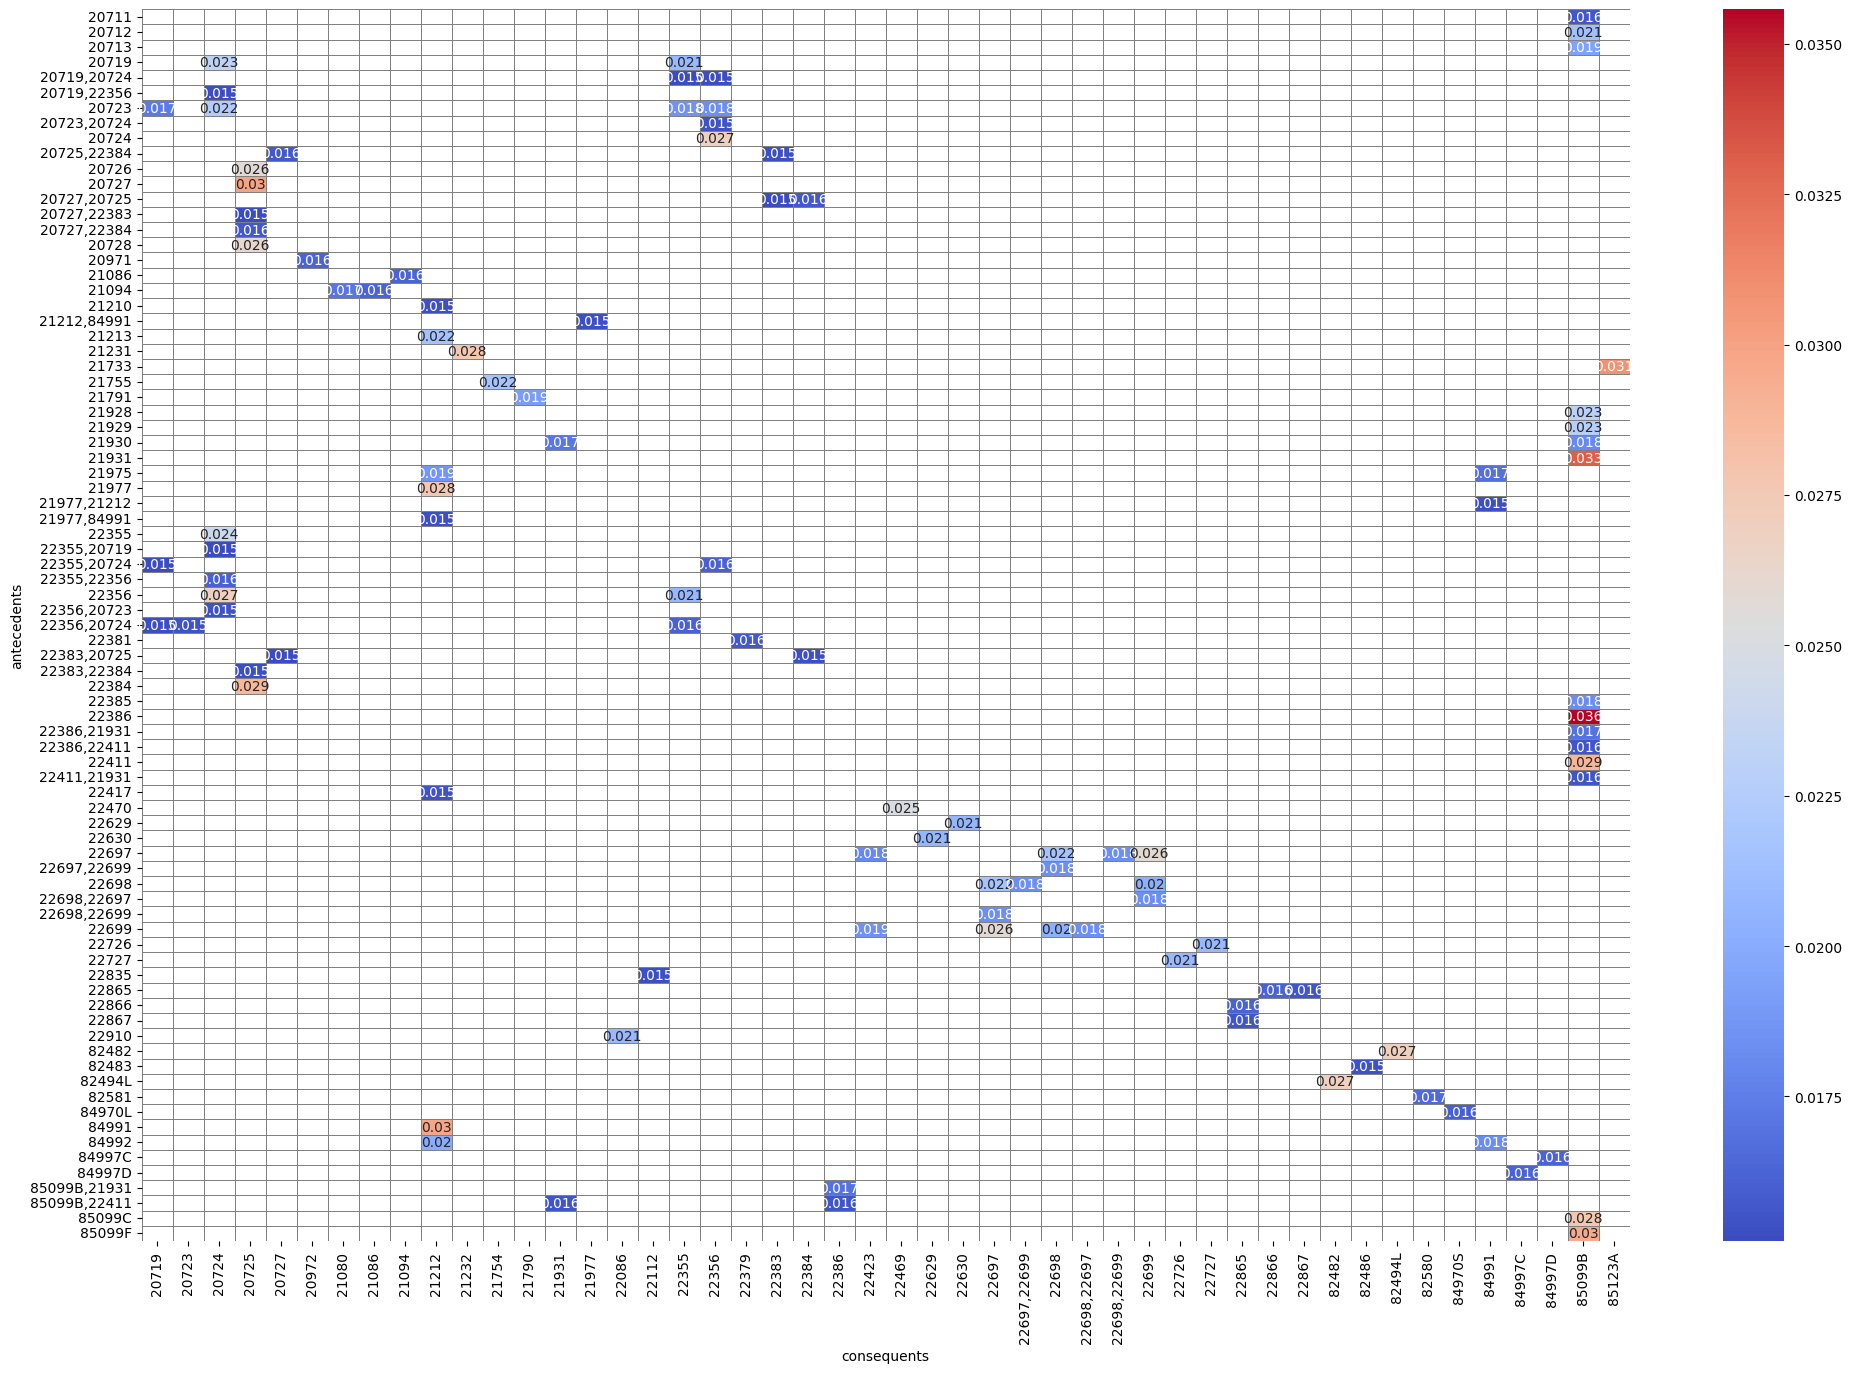

In [ ]:
support_table = rules_filtered.pivot(index='antecedents', columns='consequents',
values='support')
plt.figure(figsize=(24, 16))  # Adjust the width and height
sns.heatmap(support_table, annot=True, linewidths=0.5, linecolor='gray', cmap='coolwarm')
plt.show()


##Conclusion:
Insights from Market Basket Analysis for E-Commerce Optimization
Our Market Basket Analysis (MBA) has provided valuable insights into customer purchasing behavior, revealing strong associations between frequently bought products.

Key Product Associations:

The most sold product, "WORLD WAR 2 GLIDERS ASSTD DESIGNS," along with "WHITE HANGING HEART T-LIGHT HOLDER," highlights a strong demand for decorative and novelty items.
Items related to baking and party supplies, such as cake cases and popcorn holders, also frequently appear together, indicating a strong cross-selling opportunity for party and event-related products.
Association Rules and Confidence Levels:

The top association rules reveal that certain product pairs are frequently purchased together with high confidence and lift values.
Filtering by confidence > 50% and lift > 1 resulted in 107 strong association rules, meaning these product pairings significantly influence purchase behavior.
Visualizing Product Relationships:

The heatmap visualization confirms the strong co-occurrence of certain products, with high confidence and lift values further supporting these findings.
This can be leveraged for personalized recommendations, ensuring that customers see relevant complementary products based on their purchase history.

##Next Step

To further enhance business insights, the next phase of analysis will focus on seasonality trends to improve demand forecasting and inventory management. Implementing K-Means clustering will refine customer segmentation, enabling personalized marketing and targeted retention strategies. Additionally, applying dimensionality reduction (PCA/t-SNE) and text mining on product descriptions will uncover hidden patterns in purchasing behaviors. These advanced techniques will strengthen data-driven decision-making, optimizing product recommendations, marketing strategies, and operational efficiency for sustained e-commerce growth.

##AI Statement

For this project, we utilized ChatGPT to assist in brainstorming textual data writing and
generating ideas on how to effectively approach data handling strategies. The AI model provided
insights on structuring dataset descriptions, which unsupervised models to use, and identifying
key features for analysis. While the final decisions and implementations were made
independently, ChatGPT served as a supportive tool in refining the approach and enhancing
efficiency.